In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
def load_semantic3d(xyz_rgb_intensity_txt, label_txt,
                    normalize_xyz=True,
                    normalize_intensity=True):
    data = np.loadtxt(xyz_rgb_intensity_txt)
    labels = np.loadtxt(label_txt).reshape(-1, 1)

    xyz = data[:, 0:3]
    intensity = data[:, 3:4]
    rgb = data[:, 4:7] / 255.0

    if normalize_xyz:
        xyz = (xyz - xyz.mean(axis=0)) / xyz.std(axis=0)

    if normalize_intensity:
        intensity = (intensity - intensity.min()) / (intensity.max() - intensity.min() + 1e-8)

    dataset = np.hstack([xyz, rgb, intensity, labels])
    return dataset

In [6]:
def save_dataset(dataset, base_name):
    np.save(base_name + ".npy", dataset)
    np.savetxt(base_name + ".txt", dataset, fmt="%.6f")

    with h5py.File(base_name + ".h5", "w") as f:
        f.create_dataset("dataset", data=dataset)

In [7]:
def plot_label_distribution(dataset):
    labels = dataset[:, -1]
    plt.hist(labels, bins=np.unique(labels).size)
    plt.xlabel("Метка")
    plt.ylabel("Количество")
    plt.title("Распределение меток")
    plt.show()

[[ 1.78632456  3.59638421 -0.48669514  0.49803922  0.55294118  0.60392157
   0.19296403  0.        ]
 [ 1.76212791  3.60562678 -0.56343715  0.50980392  0.55294118  0.62352941
   0.21659228  0.        ]
 [ 1.7619425   3.60572014 -0.61555776  0.54509804  0.59215686  0.64705882
   0.17931216  6.        ]
 [ 1.7632404   3.60487991 -0.61651703  0.51372549  0.57647059  0.63921569
   0.16907325  0.        ]
 [ 1.76305499  3.60478655 -0.61651703  0.51764706  0.56862745  0.63137255
   0.1577842   0.        ]]


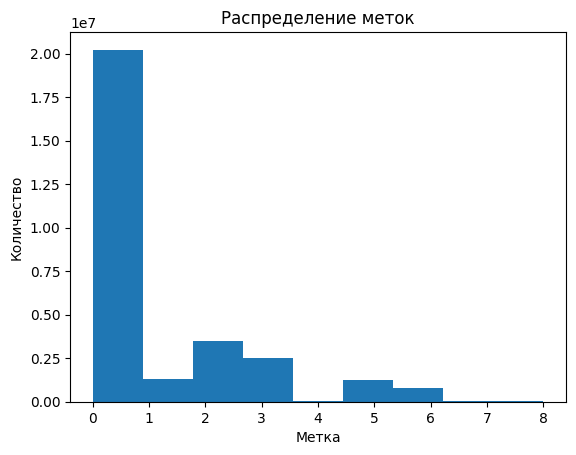

In [8]:
xyz_rgb_intensity_txt = "bildstein_station1_xyz_intensity_rgb.txt"
label_txt = "bildstein_station1_xyz_intensity_rgb.labels"

dataset = load_semantic3d(xyz_rgb_intensity_txt, label_txt)
save_dataset(dataset, "semantic3d_dataset")

print(dataset[:5])
plot_label_distribution(dataset)